In [9]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

4423680/4422102 [==============================] - 2s 0us/step


In [10]:
train_images.shape

(60000, 28, 28)

60,000 images of 28x28 pixels

In [16]:
train_images[0,13,18] # Each pixel has value from 0(black) to 255(white)

232

In [17]:
train_labels[:10] 

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [18]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

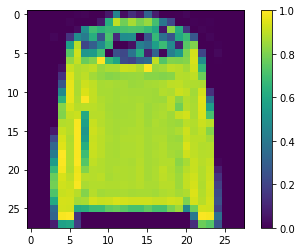

In [44]:
plt.figure()
plt.imshow(train_images[1562])
plt.colorbar()
plt.grid(False)
plt.show()

In [27]:
# preprocessing pixel values to ensure that all pixel values are between 0 and 255
train_images = train_images / 255.0

test_images = test_images / 255.0

In [30]:
#Architecture of our NN model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])
#Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#Fit the model to training data i.e. Training model
model.fit(train_images, train_labels, epochs=10)  # we pass the data, labels and epochs and watch the magic!

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5036 - accuracy: 0.8229
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3784 - accuracy: 0.8627
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3370 - accuracy: 0.8765
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3138 - accuracy: 0.8844
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2950 - accuracy: 0.8920
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2802 - accuracy: 0.8974
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2675 - accuracy: 0.9007
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2579 - accuracy: 0.9050
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2476 - accuracy: 0.9069
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.239

In [31]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test Loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.3360 - accuracy: 0.8807
Test Loss: 0.335987389087677
Test accuracy: 0.8806999921798706


In [45]:
predictions = model.predict(test_images)
class_names[np.argmax(predictions[1562])]

'Shirt'

Pick a number: 45
label: Sneaker
guess: Ankle boot


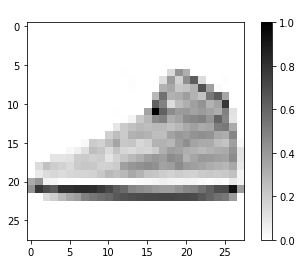

In [54]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def show_image(img, label, guess):
    plt.figure()
    plt.imshow(img, cmap=plt.cm.binary)
    plt.title("Excpected: " + label)
    plt.xlabel("Guess: " + guess)
    print("label: "+label)
    print("guess: "+guess)
    plt.colorbar()
    plt.grid(False)
    plt.show()

def predict(model, image, correct_label):
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    prediction = model.predict(np.array([image]))
    predicted_class = class_names[np.argmax(prediction)]

    show_image(image, class_names[correct_label], predicted_class)





def get_number():
    while True:
        num = input("Pick a number: ")
        if num.isdigit():
            num = int(num)
            if 0 <= num <= 1000:
                return int(num)
        else:
            print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
